In [1]:
import sys
sys.path.append('/home/mohilbajaj2002/anaconda3/envs/fleetnews/lib/python3.6/site-packages')

In [98]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Pre-Processing

In [50]:
df = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [8]:
len(df)

65251

In [16]:
df['Full Address'] = df.block + ' ' + df.street_name
df['Full Address'].unique()

array(['174 ANG MO KIO AVE 4', '541 ANG MO KIO AVE 10',
       '163 ANG MO KIO AVE 4', ..., '887A WOODLANDS DR 50',
       '505 WOODLANDS DR 14', '779 YISHUN AVE 2'], dtype=object)

In [ ]:
dateformat = '%Y-%m' 

for i in range(0,len(df)):
    atime = dt.datetime.strptime(df.loc[i,'month'], dateformat)
    df.loc[i,'Transaction_Year'] = atime.year
    df.loc[i,'Transaction_Month'] = atime.month
    
df.head()

# Base Models

In [9]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [29]:
dateformat = '%Y-%m' 

for i in range(0,len(df)):
    atime = dt.datetime.strptime(df.loc[i,'month'], dateformat)
    df.loc[i,'Transaction_Year'] = atime.year
    df.loc[i,'Transaction_Month'] = atime.month
    
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Transaction_Year,Transaction_Month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015.0,1.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015.0,1.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015.0,1.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015.0,1.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015.0,1.0


In [76]:
def standardize(df, numeric_only=True):
    
    # subtracy mean and divide by std
    df = (df - df.mean()) / df.std()
    
    return df

In [30]:
df['floor_area_sqm'] = standardize(df['floor_area_sqm'])
df['remaining_lease'] = standardize(df['remaining_lease'])
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Transaction_Year,Transaction_Month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,-1.549336,Improved,1986,-0.357556,255000.0,2015.0,1.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1981,-0.798041,275000.0,2015.0,1.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,-1.177503,New Generation,1980,-0.886138,285000.0,2015.0,1.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1979,-0.974235,290000.0,2015.0,1.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,-1.218818,New Generation,1980,-0.886138,290000.0,2015.0,1.0


In [16]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [19]:
df.block.nunique()

2199

In [31]:
columns = ['town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 'Transaction_Year', 'Transaction_Month']

for c in columns:
    dummies = pd.get_dummies(df[c], prefix = c) 
    df = pd.concat([df, dummies], axis=1)
    
df = df.drop(['town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 'Transaction_Year', 'Transaction_Month',
              'month', 'block', 'lease_commence_date' ], axis=1)
print(df.shape)
df.head()

(65251, 615)


,floor_area_sqm,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,Transaction_Month_3.0,Transaction_Month_4.0,Transaction_Month_5.0,Transaction_Month_6.0,Transaction_Month_7.0,Transaction_Month_8.0,Transaction_Month_9.0,Transaction_Month_10.0,Transaction_Month_11.0,Transaction_Month_12.0
0,-1.549336,-0.357556,255000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.218818,-0.798041,275000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.177503,-0.886138,285000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.218818,-0.974235,290000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.218818,-0.886138,290000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
label = df['resale_price']
df = df.drop('resale_price', axis = 1)

In [33]:
train_features, test_features, train_labels, test_labels = train_test_split(df, label, test_size = 0.20, 
                                                                            random_state = 42)
test_labels = test_labels.values

In [90]:
def evaluate(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    
    count = 0
    #predictions_df = pd.DataFrame(predictions, columns=['Predictions']).reset_index(drop=True)
    predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
    test_labels_df = pd.DataFrame(test_labels, columns=['Target']).reset_index(drop=True)
    errors = pd.DataFrame(columns=['Errors'])
    mape = pd.DataFrame(columns=['MAPE'])
    
    print (predictions)
    #print (predictions_df.head(10))
    #print (test_labels_df.head(10))
    
    for i in range(0,len(predictions)):
        errors.loc[i,'Errors'] = abs(predictions_df.loc[i,'Predictions'] - test_labels_df.loc[i,'Target'])
        mape.loc[i, 'MAPE'] = 100 * (errors.loc[i,'Errors'] / test_labels_df.loc[i,'Target'])
        count = count + mape.loc[i, 'MAPE']
        #print (count)
        #errors[i] = abs(predictions[i] - test_labels[i])
        #mape[i] = 100 * (errors[i] / test_labels[i])
        #count = count + mape[i]
     
    
    mape_value = count/len(predictions)
    accuracy = 100 - mape_value
    
    # print('Average Error: {:0.4f} degrees.'.format(errors.mean(axis=1)))
    print (count, len(predictions))
    print('MAPE = {:0.2f}%.'.format(mape_value))
    
    return predictions

In [25]:
# Random Forest
param_grid = {
    'max_depth': [1, 5, 25, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [300, 500, 1000],
    'n_estimators': [100, 250, 500, 1000]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(train_features, train_labels)

print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', best_grid.score(test_features, test_labels))

pred_rf = evaluate(best_grid, test_features, test_labels)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100, total=   9.1s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100, total=   8.3s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100, total=   7.5s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250, total=  23.7s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250, total=  20.4s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250, total=  23.6s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500, total=  43.9s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_es

[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=100, total=  27.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250, total= 1.2min
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250, total= 1.2min
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=250, total= 1.3min
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=500, total= 2.6min
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=500, n_estimators=500, total= 2.7min
[CV] max_depth=5, max_features=auto, min_samples_leaf=500, n_es

[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=100, total=  34.2s
[CV] max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250, total= 1.4min
[CV] max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250, total= 1.4min
[CV] max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=250, total= 1.5min
[CV] max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=500, total= 3.0min
[CV] max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=1000, n_estimators=500, total= 2.7min
[CV] max_depth=25, max_features=auto, min

[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 361.0min finished


{'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 300, 'n_estimators': 250}
Model Performance

Accuracy Metric 1:  0.7201892546628625
     Predictions
0  386849.616828
1  375966.902030
2  424972.449247
3  302207.486002
4  309182.159283
5  550421.382136
6  536008.185603
7  286910.999229
8  659362.516915
9  630458.533664
Empty DataFrame
Columns: [Target]
Index: []


KeyError: 'the label [0] is not in the [index]'

In [49]:
pred_rf = evaluate(best_grid, test_features, test_labels)
print (pred_rf)

[386849.61682779 375966.90203    424972.44924709 ... 481571.32380683
 286886.96814444 658389.55629953]
146242.24514579124 13051
MAPE = 11.21%.
[386849.61682779 375966.90203    424972.44924709 ... 481571.32380683
 286886.96814444 658389.55629953]


In [30]:
print(best_grid.feature_importances_)

[6.41751600e-01 1.43375699e-01 6.16143788e-05 3.65327106e-04
 0.00000000e+00 2.06828454e-03 3.26686506e-02 4.01087319e-03
 0.00000000e+00 0.00000000e+00 1.56233245e-02 0.00000000e+00
 0.00000000e+00 4.35283906e-03 0.00000000e+00 8.65793898e-03
 0.00000000e+00 0.00000000e+00 6.68176065e-03 1.52327817e-03
 1.77244346e-03 3.73000910e-03 7.80051509e-03 0.00000000e+00
 6.32313273e-03 0.00000000e+00 2.43212500e-02 7.24390395e-03
 0.00000000e+00 0.00000000e+00 1.04241651e-03 1.09499928e-03
 8.17262167e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [31]:
# Deep Neural Nets
model2 = Sequential()
model2.add(Dense(900, input_dim=614, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1800, kernel_initializer='normal', activation='relu'))
model2.add(Dense(900, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1800, kernel_initializer='normal', activation='relu'))
model2.add(Dense(900, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(train_features, train_labels, epochs=3, batch_size=50,  verbose=1)

print('Model Performance')
print ('')

pred_nn1 = evaluate(model2, test_features, test_labels)

Epoch 1/3
52200/52200 [==============================] - 283s 5ms/step - loss: 5435422703.8774
Epoch 2/3
52200/52200 [==============================] - 421s 8ms/step - loss: 930910242.3908
Epoch 3/3
52200/52200 [==============================] - 436s 8ms/step - loss: 822805411.3410
Model Performance

    Predictions
0  397367.03125
1  358395.81250
2  359081.93750
3  276394.62500
4  303126.84375
5  558459.62500
6  456261.18750
7  309468.75000
8  619466.87500
9  560196.81250
     Target
0  392500.0
1  325000.0
2  378000.0
3  292000.0
4  310000.0
5  565000.0
6  465000.0
7  285000.0
8  598000.0
9  525000.0
Model Performance
62903.14833154232 13051
MAPE = 4.82%.


In [50]:
pred_nn1 = evaluate(model2, test_features, test_labels)
print (pred_nn1)

[[397367.03]
 [358395.8 ]
 [359081.94]
 ...
 [368153.47]
 [298085.47]
 [952734.9 ]]
62903.14830369141 13051
MAPE = 4.82%.
[[397367.03]
 [358395.8 ]
 [359081.94]
 ...
 [368153.47]
 [298085.47]
 [952734.9 ]]


In [36]:
# Lasso Regression

param_grid = { 'alpha': [1e-5,1e-4, 1e-3,1e-2, 1, 5, 10],
               'max_iter': [10000]
            }

lasso = LassoCV(alphas=[1e-5,1e-4, 1e-3,1e-2, 1, 5, 10], max_iter=10000, cv=3, normalize=False)
lasso.fit(train_features, train_labels)
print ('alphas', lasso.alpha_)

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


NameError: name 'reg' is not defined

In [37]:
lasso.alpha_

0.01

In [51]:
alpha = lasso.alpha_
reg = Lasso(alpha=alpha)
reg.fit(train_features, train_labels)
nonzeros = (reg.coef_ != 0).sum()
print("Non-zeros coef: " , nonzeros)
print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', reg.score(test_features, test_labels))

pred_lasso = evaluate(reg, test_features, test_labels)
print (pred_lasso)

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Non-zeros coef:  612
Model Performance

Accuracy Metric 1:  0.93285764034813
[439801.03054163 344975.43317004 393798.59659145 ... 377024.25589522
 282641.33266025 940378.17158384]
85686.26777859783 13051
MAPE = 6.57%.
[439801.03054163 344975.43317004 393798.59659145 ... 377024.25589522
 282641.33266025 940378.17158384]


In [52]:
print(reg.coef_)

[ 7.84378663e+04  4.96397884e+04  6.56990269e+04  5.10948041e+04
  1.70030355e+05 -9.50173168e+03  1.66343533e+05 -5.57043334e+04
  2.70347140e+05  2.50878446e+05 -9.28751022e+04  1.10816766e+05
  9.54282385e+04  8.93025509e+02  2.50205240e+04 -4.45150369e+04
  1.21195098e+05  2.21354954e+05 -2.83187955e+04 -5.26166460e+04
  1.79524847e+05 -9.68411732e+04 -6.19399336e+04  7.09357822e+04
  2.98492318e+04  1.18291349e+05 -7.75690957e+04 -2.59298599e+04
 -4.13672936e+04 -6.16108318e+04 -4.69005755e+04 -1.88906104e+04
  2.73410357e+03  2.41763433e+04  9.94389838e+04 -1.31564393e+04
 -2.75539376e+04  6.03873680e+04  9.23110379e+03  7.68344940e+03
  6.80931456e+03 -3.83942371e+04 -1.22278641e+04 -2.53402841e+04
  3.44724896e+04  1.06948911e+04  2.01223843e+05  3.51678470e+04
  5.75892736e+03  6.07299087e+03  5.64657500e+04  2.76909689e+04
  2.00461565e+04  4.78195484e+04 -2.62788049e+04  5.22749278e+04
  6.02144496e+04  6.48924142e+04  6.42389380e+04 -3.09530490e+04
 -6.91532269e+01  1.42483

In [34]:
# XGBoost
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)

model_xgb.fit(train_features, train_labels)

print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', model_xgb.score(test_features, test_labels))

pred_xgb = evaluate(model_xgb, test_features, test_labels)

Model Performance

Accuracy Metric 1:  0.9690619683284849
[406040.25 343976.25 372216.53 ... 367752.6  297057.38 969671.4 ]
55636.11877284717 13051
MAPE = 4.26%.


In [35]:
pred_xgb = evaluate(model_xgb, test_features, test_labels)
print (pred_xgb)

[406040.25 343976.25 372216.53 ... 367752.6  297057.38 969671.4 ]
55636.11877284717 13051
MAPE = 4.26%.
[406040.25 343976.25 372216.53 ... 367752.6  297057.38 969671.4 ]


In [42]:
print(model_xgb.feature_importances_)

[1.07671358e-01 8.32822099e-02 2.17706827e-03 1.91522157e-03
 2.85038818e-03 1.26434548e-03 2.61098566e-03 1.36908412e-03
 2.04240414e-03 1.75063219e-03 1.32419611e-03 1.68330013e-03
 1.98255363e-03 1.28678943e-03 1.11471873e-03 1.66833750e-03
 2.75313086e-03 1.69826287e-03 9.80054727e-04 9.35166783e-04
 2.81298161e-03 1.03990547e-03 1.27182680e-03 1.34664017e-03
 1.39900949e-03 2.25188164e-03 1.77307613e-03 1.33167743e-03
 7.48133389e-05 1.34664017e-03 1.35112889e-02 2.06410009e-02
 1.84489693e-02 9.19455942e-03 3.81548045e-04 7.03245401e-04
 3.89029359e-04 6.80801400e-04 6.50876085e-04 1.42145349e-04
 3.59104044e-04 2.69328040e-04 5.61100082e-04 5.68581396e-04
 1.51122943e-03 5.38656081e-04 4.26436047e-04 1.49626681e-03
 9.27685411e-04 5.98506711e-04 8.30428093e-04 4.18954703e-04
 1.49626685e-05 1.57108021e-04 1.12220012e-04 5.01249393e-04
 9.87536041e-04 1.54863612e-03 4.78805392e-04 2.16958695e-04
 2.31921353e-04 2.69328040e-04 1.20449474e-03 9.72573398e-05
 7.03245401e-04 1.024942

In [36]:
best_feature = pd.DataFrame()
best_feature['Column Name'] = df.columns
best_feature['Importance'] = model_xgb.feature_importances_
best_feature = best_feature.sort_values('Importance', ascending=False )

In [38]:
best_feature.head(10)

,Column Name,Importance
0,floor_area_sqm,0.107671
1,remaining_lease,0.083282
600,Transaction_Year_2017.0,0.024554
599,Transaction_Year_2016.0,0.022377
598,Transaction_Year_2015.0,0.021524
31,flat_type_4 ROOM,0.020641
561,storey_range_04 TO 06,0.019773
560,storey_range_01 TO 03,0.019160
32,flat_type_5 ROOM,0.018449
562,storey_range_07 TO 09,0.017013


In [39]:
print ('R-squared Score for XGB model: ', r2_score(test_labels,pred_xgb))

R-squared Score for XGB model:  0.9690619683284849


In [87]:
# Ensemble
a = 0
ensemble2 = []

for i in range(0,len(pred_rf)):
    a = (pred_rf[i] + pred_nn1[i] + pred_lasso[i] + pred_xgb[i])/4
    ensemble2.insert(i,a) 
    
print (np.shape(ensemble2))
count5 = error = mape = 0
err5 = []
ma5 = []

for i in range(0,len(ensemble2)):
    error = abs(ensemble2[i] - test_labels[i])
    mape = 100 * (error / test_labels[i])
    err5.insert(i, error)
    ma5.insert(i, mape)

ma_final = np.array(ma5)
count5 = ma_final.sum()
    
mape_value5 = count5/len(ma_final)
#accuracy5 = 100 - mape_value5
print('Model Performance ')
print (count5, len(ma_final))
print('MAPE = {:0.2f}%.'.format(mape_value5))

(13051, 1)
Model Performance 
69240.78 13051
MAPE = 5.31%.


In [89]:
# Ensemble 2 
a = 0
ensemble3 = []

for i in range(0,len(pred_rf)):
    a = (pred_rf[i] + pred_nn1[i])/2
    ensemble3.insert(i,a) 
    
print (np.shape(ensemble3))
count5 = error = mape = 0
err5 = []
ma5 = []

for i in range(0,len(ensemble3)):
    error = abs(ensemble3[i] - test_labels[i])
    mape = 100 * (error / test_labels[i])
    err5.insert(i, error)
    ma5.insert(i, mape)

ma_final = np.array(ma5)
count5 = ma_final.sum()
    
mape_value5 = count5/len(ma_final)
#accuracy5 = 100 - mape_value5
print('Model Performance ')
print (count5, len(ma_final))
print('MAPE = {:0.2f}%.'.format(mape_value5))

(13051, 1)
Model Performance 
90802.266 13051
MAPE = 6.96%.


In [88]:
first = pd.DataFrame()
first['test_labels'] = test_labels
first['pred_rf'] = pred_rf
first['pred_nn1'] = pred_nn1
first['pred_lasso'] = pred_lasso
first['pred_xgb'] = pred_xgb
first['ensemble'] = ensemble2
first.head()

,test_labels,pred_rf,pred_nn1,pred_lasso,pred_xgb,ensemble
0,392500.0,386849.616828,397367.03125,439801.030542,406040.25000,[407514.47]
1,325000.0,375966.902030,358395.81250,344975.433170,343976.25000,[355828.62]
2,378000.0,424972.449247,359081.93750,393798.596591,372216.53125,[387517.38]
3,292000.0,302207.486002,276394.62500,234508.428686,276317.62500,[272357.06]
4,310000.0,309182.159283,303126.84375,303734.662618,298722.43750,[303691.5]


In [90]:
first['ensemble_2'] = ensemble3
first.head()

,test_labels,pred_rf,pred_nn1,pred_lasso,pred_xgb,ensemble,ensemble_2
0,392500.0,386849.616828,397367.03125,439801.030542,406040.25000,[407514.47],[392108.3]
1,325000.0,375966.902030,358395.81250,344975.433170,343976.25000,[355828.62],[367181.38]
2,378000.0,424972.449247,359081.93750,393798.596591,372216.53125,[387517.38],[392027.2]
3,292000.0,302207.486002,276394.62500,234508.428686,276317.62500,[272357.06],[289301.06]
4,310000.0,309182.159283,303126.84375,303734.662618,298722.43750,[303691.5],[306154.5]


In [91]:
first.to_csv('performance_basemodels.csv')

# Feature Engineering and Selection

In [44]:
# Getting latitude/longitude for HDB Flats

hdb_geo = pd.read_csv('hdb_blocks_location.csv')
hdb_geo.head()

,Unnamed: 0,full_address,latitude,longitude
0,0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431
1,1,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082
2,2,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246
3,3,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186
4,4,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722


In [51]:
df['full_address'] = df.block + ' ' + df.street_name + ' Singapore'
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore


In [52]:
for i in range(0,len(df)):
    for j in range(0,len(hdb_geo)):
        if (df.loc[i,'full_address'] == hdb_geo.loc[j,'full_address']):
            df.loc[i,'latitude'] = hdb_geo.loc[j,'latitude']
            df.loc[i,'longitude'] = hdb_geo.loc[j,'longitude']

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722


In [57]:
df.longitude.isnull().sum()

0

In [23]:
from math import pi,sqrt,sin,cos,atan2

def haversine(lat1, long1, lat2, long2):

    degree_to_rad = float(pi / 180.0)

    d_lat = (lat2 - lat1) * degree_to_rad
    d_long = (long2 - long1) * degree_to_rad

    a = pow(sin(d_lat / 2), 2) + cos(lat1 * degree_to_rad) * cos(lat2 * degree_to_rad) * pow(sin(d_long / 2), 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    km = 6367 * c
    mi = 3956 * c

    return km

In [41]:
# Getting other information for HDB Flats

hdb_other = pd.read_csv('hdb-property-information.csv')
hdb_other.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,60,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
1,61,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
2,62,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,63,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
4,67,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0


In [55]:
hdb_other['full_address'] = hdb_other.blk_no + ' ' + hdb_other.street + ' Singapore'
hdb_other.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,full_address
0,60,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,60 SENG POH LANE Singapore
1,61,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,61 SENG POH LANE Singapore
2,62,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,62 SENG POH LANE Singapore
3,63,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,63 SENG POH LANE Singapore
4,67,SENG POH LANE,1,1937,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,67 SENG POH LANE Singapore


In [58]:
for i in range(0,len(df)):
    for j in range(0,len(hdb_other)):
        if (df.loc[i,'full_address'] == hdb_other.loc[j,'full_address']):
            df.loc[i,'max_floors'] = hdb_other.loc[j,'max_floor_lvl']
            df.loc[i,'total_flats_in_block'] = hdb_other.loc[j,'total_dwelling_units']
            df.loc[i,'multistorey_carpark'] = hdb_other.loc[j,'multistorey_carpark']
     
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), ' !')
        
df.head()

0  records done out of  65251  !
5000  records done out of  65251  !
10000  records done out of  65251  !
15000  records done out of  65251  !
20000  records done out of  65251  !
25000  records done out of  65251  !
30000  records done out of  65251  !
35000  records done out of  65251  !
40000  records done out of  65251  !
45000  records done out of  65251  !
50000  records done out of  65251  !
55000  records done out of  65251  !
60000  records done out of  65251  !
65000  records done out of  65251  !


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,11.0,198.0,N
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,8.0,191.0,N
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,4.0,84.0,N
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,4.0,23.0,N
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,13.0,187.0,N


In [59]:
df.to_csv('wip_11082018.csv')

In [4]:
df = pd.read_csv('wip_11082018.csv')
df.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,11.0,198.0,N
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,8.0,191.0,N
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,4.0,84.0,N
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,4.0,23.0,N
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,13.0,187.0,N


In [19]:
for i in range(0,len(df)):
    year = df.loc[i,'month'].split('-')[0]
    month = df.loc[i,'month'].split('-')[1]
    df.loc[i,'Year'] = year
    df.loc[i,'Month'] = month
    
df.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark,Year,Month
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,11.0,198.0,N,2015,01
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,8.0,191.0,N,2015,01
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,4.0,84.0,N,2015,01
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,4.0,23.0,N,2015,01
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,13.0,187.0,N,2015,01


In [5]:
df.max_floors.isnull().sum()

0

In [6]:
# Getting cpi information

cpi = pd.read_csv('consumer-price-index-base-year-2014-100-monthly.csv')
cpi.head()

,month,level_1,value
0,1961-01,All Items,24.665
1,1961-01,All Items Less Imputed Rentals On Owner-occupi...,na
2,1961-01,All Items Less Accommodation,na
3,1961-01,MAS Core Inflation Measure,na
4,1961-02,All Items,24.689


In [8]:
for i in range(0,len(cpi)):
    year = cpi.loc[i,'month'].split('-')[0]
    month = cpi.loc[i,'month'].split('-')[1]
    cpi.loc[i,'Year'] = year
    cpi.loc[i,'Month'] = month
    
cpi.head()

,month,level_1,value,Year,Month
0,1961-01,All Items,24.665,1961,01
1,1961-01,All Items Less Imputed Rentals On Owner-occupi...,na,1961,01
2,1961-01,All Items Less Accommodation,na,1961,01
3,1961-01,MAS Core Inflation Measure,na,1961,01
4,1961-02,All Items,24.689,1961,02


In [14]:
cpi = cpi[cpi.level_1 == 'All Items']
cpi.head()

,month,level_1,value,Year,Month
0,1961-01,All Items,24.665,1961,01
4,1961-02,All Items,24.689,1961,02
8,1961-03,All Items,24.709,1961,03
12,1961-04,All Items,24.309,1961,04
16,1961-05,All Items,24.174,1961,05


In [18]:
cpi = cpi[645:]
cpi = cpi.reset_index(drop=True)
cpi.head()

,month,level_1,value,Year,Month
0,2014-10,All Items,99.754,2014,10
1,2014-11,All Items,99.941,2014,11
2,2014-12,All Items,99.828,2014,12
3,2015-01,All Items,99.613,2015,01
4,2015-02,All Items,99.71,2015,02


In [20]:
for i in range (0,len(df)):
    for j in range (0,len(cpi)):
        if (df.loc[i,'Year'] == cpi.loc[j,'Year'] and df.loc[i,'Month'] == cpi.loc[j,'Month']):
            df.loc[i,'CPI Value'] = cpi.loc[j,'value']
                 
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), '!')
        
df.head()

0  records done out of  65251 !
5000  records done out of  65251 !
10000  records done out of  65251 !
15000  records done out of  65251 !
20000  records done out of  65251 !
25000  records done out of  65251 !
30000  records done out of  65251 !
35000  records done out of  65251 !
40000  records done out of  65251 !
45000  records done out of  65251 !
50000  records done out of  65251 !
55000  records done out of  65251 !
60000  records done out of  65251 !
65000  records done out of  65251 !


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark,Year,Month,CPI Value
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,11.0,198.0,N,2015,01,99.613
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,8.0,191.0,N,2015,01,99.613
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,4.0,84.0,N,2015,01,99.613
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,4.0,23.0,N,2015,01,99.613
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,13.0,187.0,N,2015,01,99.613


In [25]:
df['CPI Value'].isnull().sum()

0

In [21]:
# Getting latitude/longitude for MRT

mrt_geo = pd.read_csv('mrt_location.csv')
mrt_geo.head()

,Unnamed: 0,stn_code,mrt_station_english,mrt_line_english,latitude,longitude
0,0,NS1,Jurong East MRT Station Singapore,North South Line,1.333131,103.742091
1,1,NS2,Bukit Batok MRT Station Singapore,North South Line,1.348506,103.749222
2,2,NS3,Bukit Gombak MRT Station Singapore,North South Line,1.358915,103.751831
3,3,NS4,Choa Chu Kang MRT Station Singapore,North South Line,1.385385,103.744337
4,4,NS5,Yew Tee MRT Station Singapore,North South Line,1.397329,103.747502


In [24]:
km = haversine(1.333131, 103.742091, 1.348506, 103.749222)
km

1.8832803577250705

In [27]:
count1 = count2 = count3 = 0
distance = []

for i in range (0,len(df)):
    for j in range (0,len(mrt_geo)):
        lat1 = df.loc[i,'latitude']
        long1 = df.loc[i,'longitude']
        lat2 = mrt_geo.loc[j,'latitude']
        long2 = mrt_geo.loc[j,'longitude']
        km = haversine(lat1, long1, lat2, long2)
        distance.append(km)
        
        if (km <= 1):
            count1 = count1 + 1
            
        if (km <= 2):
            count2 = count2 + 1
            
        if (km <= 3):
            count3 = count3 + 1
            
    df.loc[i, 'Nearest Station Distance'] = min(distance)
    df.loc[i, 'Stations within 1 km'] = count1
    df.loc[i, 'Stations within 2 km'] = count2
    df.loc[i, 'Stations within 3 km'] = count3
    distance = []
    count1 = count2 = count3 = 0
    
                 
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), '!')
        
df.head()

0  records done out of  65251 !
5000  records done out of  65251 !
10000  records done out of  65251 !
15000  records done out of  65251 !
20000  records done out of  65251 !
25000  records done out of  65251 !
30000  records done out of  65251 !
35000  records done out of  65251 !
40000  records done out of  65251 !
45000  records done out of  65251 !
50000  records done out of  65251 !
55000  records done out of  65251 !
60000  records done out of  65251 !
65000  records done out of  65251 !


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,max_floors,total_flats_in_block,multistorey_carpark,Year,Month,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,11.0,198.0,N,2015,01,99.613,1.101391,0.0,2.0,3.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,8.0,191.0,N,2015,01,99.613,0.810209,1.0,2.0,5.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,4.0,84.0,N,2015,01,99.613,1.135645,0.0,2.0,5.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,4.0,23.0,N,2015,01,99.613,0.666619,1.0,4.0,8.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,13.0,187.0,N,2015,01,99.613,0.921761,1.0,2.0,5.0


In [29]:
print (df['Nearest Station Distance'].isnull().sum(), df['Stations within 1 km'].isnull().sum() )

0 0


In [30]:
print (df['Stations within 2 km'].isnull().sum(), df['Stations within 3 km'].isnull().sum())

0 0


In [28]:
# Getting latitude/longitude for Hawker Centres

hawker_geo = pd.read_csv('hawker_centre_location.csv')
hawker_geo.head()

,Unnamed: 0,address,latitude,longitude
0,0,"2, Adam Road, Singapore 289876",1.32413197,103.814163
1,1,"Blk 453A, Ang Mo Kio Ave 10, Singapore 561453",1.3682999599999999,103.856438
2,2,"Blk 221A/B, Boon Lay Place, Singapore 641221/6...",1.34528005,103.712852
3,3,"Blk 353, Clementi Ave 2, Singapore 120353",1.31433797,103.770775
4,4,"Blk 448, Clementi Ave 3, Singapore 120448",1.31334996,103.764587


In [34]:
hawker_geo = hawker_geo.drop(df.index[36])
hawker_geo = hawker_geo.reset_index(drop=True)
hawker_geo

,Unnamed: 0,address,latitude,longitude
0,0,"2, Adam Road, Singapore 289876",1.32413197,103.814163
1,1,"Blk 453A, Ang Mo Kio Ave 10, Singapore 561453",1.3682999599999999,103.856438
2,2,"Blk 221A/B, Boon Lay Place, Singapore 641221/6...",1.34528005,103.712852
3,3,"Blk 353, Clementi Ave 2, Singapore 120353",1.31433797,103.770775
4,4,"Blk 448, Clementi Ave 3, Singapore 120448",1.31334996,103.764587
5,5,"Blk 7, Empress Road, Singapore 260007",1.31631005,103.805687
6,6,"Blk 159, Mei Chin Road, Singapore 140159",1.29330003,103.802963
7,7,"Blk 630, Bedok Reservoir Road, Singapore 470630",1.33298004,103.914207
8,8,"Blk 335, Smith Street, Singapore 050335",1.2823,103.842880
9,9,"271, Onan Road, Singapore 424768",1.309412,103.901825


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(hawker_geo)

,Unnamed: 0,address,latitude,longitude
0,0,"2, Adam Road, Singapore 289876",1.32413197,103.814163
1,1,"Blk 453A, Ang Mo Kio Ave 10, Singapore 561453",1.3682999599999999,103.856438
2,2,"Blk 221A/B, Boon Lay Place, Singapore 641221/6...",1.34528005,103.712852
3,3,"Blk 353, Clementi Ave 2, Singapore 120353",1.31433797,103.770775
4,4,"Blk 448, Clementi Ave 3, Singapore 120448",1.31334996,103.764587
5,5,"Blk 7, Empress Road, Singapore 260007",1.31631005,103.805687
6,6,"Blk 159, Mei Chin Road, Singapore 140159",1.29330003,103.802963
7,7,"Blk 630, Bedok Reservoir Road, Singapore 470630",1.33298004,103.914207
8,8,"Blk 335, Smith Street, Singapore 050335",1.2823,103.842880
9,9,"271, Onan Road, Singapore 424768",1.309412,103.901825


In [37]:
count1 = count2 = count3 = 0
distance = []

for i in range (0,len(df)):
    for j in range (0,len(hawker_geo)):
        lat1 = df.loc[i,'latitude']
        long1 = df.loc[i,'longitude']
        lat2 = pd.to_numeric(hawker_geo.loc[j,'latitude'])
        long2 = pd.to_numeric(hawker_geo.loc[j,'longitude'])
        km = haversine(lat1, long1, lat2, long2)
        distance.append(km)
        
        
        if (km <= 1):
            count1 = count1 + 1
            
        if (km <= 2):
            count2 = count2 + 1
            
        if (km <= 3):
            count3 = count3 + 1
            
    df.loc[i, 'Nearest HC Distance'] = min(distance)
    df.loc[i, 'HC within 1 km'] = count1
    df.loc[i, 'HC within 2 km'] = count2
    df.loc[i, 'HC within 3 km'] = count3
    distance = []
    count1 = count2 = count3 = 0
    
                 
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), '!')
        
df.head()

0  records done out of  65251 !
5000  records done out of  65251 !
10000  records done out of  65251 !
15000  records done out of  65251 !
20000  records done out of  65251 !
25000  records done out of  65251 !
30000  records done out of  65251 !
35000  records done out of  65251 !
40000  records done out of  65251 !
45000  records done out of  65251 !
50000  records done out of  65251 !
55000  records done out of  65251 !
60000  records done out of  65251 !
65000  records done out of  65251 !


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,Month,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,01,99.613,1.101391,0.0,2.0,3.0,0.213388,5.0,8.0,11.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,01,99.613,0.810209,1.0,2.0,5.0,0.192770,2.0,10.0,12.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,01,99.613,1.135645,0.0,2.0,5.0,0.129491,5.0,8.0,11.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,01,99.613,0.666619,1.0,4.0,8.0,0.149308,4.0,10.0,13.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,01,99.613,0.921761,1.0,2.0,5.0,0.384020,2.0,7.0,12.0


In [38]:
# Getting latitude/longitude for Primary Schools

primary_geo = pd.read_csv('primary_schools_data.csv')
primary_geo.head()

,Unnamed: 0,full_address,latitude,longitude,Special_Needs_Fac_Availability
0,0,Anderson Primary School 19 Ang Mo Kio Avenue 9...,1.384692,103.841225,No
1,1,Ang Mo Kio Primary School 20 Ang Mo Kio Avenue...,1.369347,103.839815,No
2,2,CHIJ St. Nicholas Girls School 501 Ang Mo Kio ...,1.374373,103.834216,Yes
3,3,Jing Shan Primary School 5 Ang Mo Kio Street 5...,1.372326,103.851713,No
4,4,Mayflower Primary School 00 Ang Mo Kio Avenue ...,1.376395,103.843181,No


In [40]:
count1 = count2 = counter = 0
distance = []
disable = []
ind = 0

for i in range (0,len(df)):
    for j in range (0,len(primary_geo)):
        lat1 = df.loc[i,'latitude']
        long1 = df.loc[i,'longitude']
        lat2 = pd.to_numeric(primary_geo.loc[j,'latitude'])
        long2 = pd.to_numeric(primary_geo.loc[j,'longitude'])
        km = haversine(lat1, long1, lat2, long2)
        distance.append(km)
        
        if (km <= 2 and primary_geo.loc[j,'Special_Needs_Fac_Availability'] == 'Yes'):
            counter = counter + 1
        
        if (km <= 1):
            count1 = count1 + 1
            
        if (km <= 2):
            count2 = count2 + 1
            
    df.loc[i, 'Nearest School Distance'] = min(distance)
    df.loc[i, 'Schools within 1 km'] = count1
    df.loc[i, 'Schools within 2 km'] = count2
    
    if (counter != 0):
        df.loc[i, 'Special Needs School Availability'] = 'Yes'
    else:
        df.loc[i, 'Special Needs School Availability'] = 'No'
    
    distance = []
    count1 = count2 = counter = 0
    
                 
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), '!')
        
df.head()

0  records done out of  65251 !
5000  records done out of  65251 !
10000  records done out of  65251 !
15000  records done out of  65251 !
20000  records done out of  65251 !
25000  records done out of  65251 !
30000  records done out of  65251 !
35000  records done out of  65251 !
40000  records done out of  65251 !
45000  records done out of  65251 !
50000  records done out of  65251 !
55000  records done out of  65251 !
60000  records done out of  65251 !
65000  records done out of  65251 !


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Special Needs School Availability
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,2.0,3.0,0.213388,5.0,8.0,11.0,0.370050,3.0,7.0,Yes
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,2.0,5.0,0.192770,2.0,10.0,12.0,0.237912,2.0,7.0,Yes
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,2.0,5.0,0.129491,5.0,8.0,11.0,0.449753,3.0,7.0,Yes
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,4.0,8.0,0.149308,4.0,10.0,13.0,0.583324,4.0,9.0,Yes
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,2.0,5.0,0.384020,2.0,7.0,12.0,0.452545,2.0,8.0,Yes


In [48]:
# Adding Demographic data

demo = pd.read_csv('demo.csv')
demo.head(30)

,year,level_1,level_2,value
0,1960,Total Residents,0 - 4 Years,297000
1,1960,Total Residents,5 - 9 Years,250300
2,1960,Total Residents,10 - 14 Years,200300
3,1960,Total Residents,15 - 19 Years,124700
4,1960,Total Residents,20 - 24 Years,139500
5,1960,Total Residents,25 - 29 Years,116200
6,1960,Total Residents,30 - 34 Years,106600
7,1960,Total Residents,35 - 39 Years,86400
8,1960,Total Residents,40 - 44 Years,80500
9,1960,Total Residents,45 - 49 Years,74400


In [49]:
new_demo = pd.DataFrame()
population = ind = 0

for i in range(0,len(demo)):
    if (demo.loc[i, 'level_1'] == 'Total Residents' and demo.loc[i, 'level_2'] == '30 - 34 Years'):
        for j in range (i, i+6):
            population = population + pd.to_numeric(demo.loc[j, 'value'])
            
        new_demo.loc[ind, 'Year'] = demo.loc[i, 'year']
        new_demo.loc[ind, 'Population'] = population
    
    population = 0
    ind = ind + 1
        
new_demo.head(20)            

,Year,Population
6,1960.0,452200.0
336,1961.0,464400.0
666,1962.0,476800.0
996,1963.0,485400.0
1326,1964.0,495300.0
1656,1965.0,505900.0
1986,1966.0,519000.0
2316,1967.0,531000.0
2646,1968.0,542300.0
2976,1969.0,557400.0


In [52]:
new_demo = new_demo.reset_index(drop=True)
new_demo.head()

,Year,Population
0,1960.0,452200.0
1,1961.0,464400.0
2,1962.0,476800.0
3,1963.0,485400.0
4,1964.0,495300.0


In [56]:
new_demo.loc[len(new_demo)+1, 'Year'] = 2018
new_demo.loc[59, 'Population'] = 1801281
new_demo = new_demo.drop(new_demo.index[59])
new_demo = new_demo[53:]
new_demo = new_demo.reset_index(drop=True)
new_demo.head(10)

,Year,Population
0,2013.0,1825347.0
1,2014.0,1822767.0
2,2015.0,1822008.0
3,2016.0,1817359.0
4,2017.0,1809729.0
5,2018.0,1801281.0


In [67]:
for i in range(0,len(new_demo)):
    if (new_demo.loc[i, 'Year'] == '2018'):
        new_demo.loc[i, 'Year'] = 2018
        new_demo.loc[i, 'Population'] = 1801281
        
new_demo.head(10)

,Year,Population
0,2013,1.82535e+06
1,2014,1.82277e+06
2,2015,1.82201e+06
3,2016,1.81736e+06
4,2017,1.80973e+06
5,2018,1801281
6,2018,1801281


In [68]:
for i in range (0,len(df)):
    for j in range (0,len(new_demo)):
        if (pd.to_numeric(df.loc[i,'Year']) == new_demo.loc[j,'Year']):
            df.loc[i,'Working Population'] = new_demo.loc[j,'Population']
                 
    if (i%5000 == 0):
        print (i, ' records done out of ', len(df), '!')
        
df.head()

0  records done out of  65251 !
5000  records done out of  65251 !
10000  records done out of  65251 !
15000  records done out of  65251 !
20000  records done out of  65251 !
25000  records done out of  65251 !
30000  records done out of  65251 !
35000  records done out of  65251 !
40000  records done out of  65251 !
45000  records done out of  65251 !
50000  records done out of  65251 !
55000  records done out of  65251 !
60000  records done out of  65251 !
65000  records done out of  65251 !


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Special Needs School Availability,Working Population
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,3.0,0.213388,5.0,8.0,11.0,0.370050,3.0,7.0,Yes,1822008.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,5.0,0.192770,2.0,10.0,12.0,0.237912,2.0,7.0,Yes,1822008.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,5.0,0.129491,5.0,8.0,11.0,0.449753,3.0,7.0,Yes,1822008.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,8.0,0.149308,4.0,10.0,13.0,0.583324,4.0,9.0,Yes,1822008.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,5.0,0.384020,2.0,7.0,12.0,0.452545,2.0,8.0,Yes,1822008.0


In [69]:
df['Working Population'].isnull().sum()

0

In [70]:
df.to_csv('wip_12082018.csv')

In [72]:
# Calculation of Pearson Correlation Coeff

corr = df.corr()

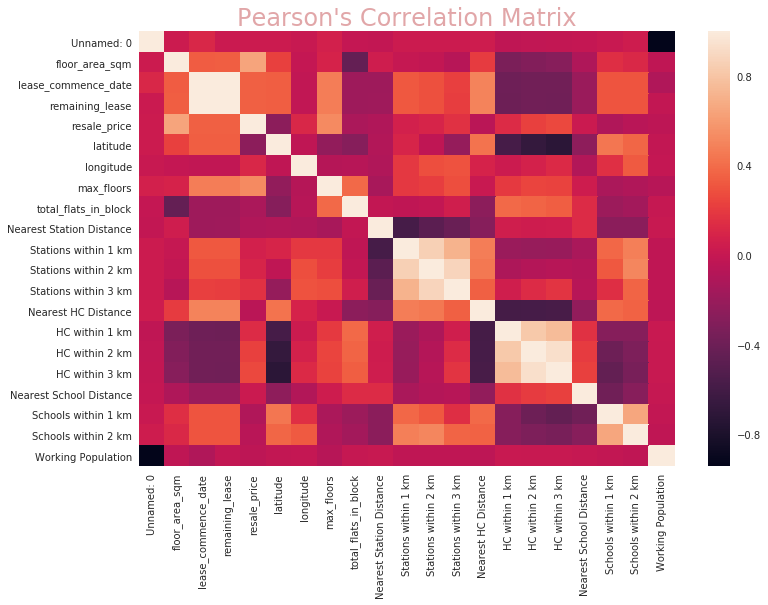

In [73]:
plot1 = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plot1.figure.set_size_inches(12,8)
plot1.axes.set_title("Pearson's Correlation Matrix", fontsize=24,color="r",alpha=0.5)

In [74]:
corr

,Unnamed: 0,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,latitude,longitude,max_floors,total_flats_in_block,Nearest Station Distance,...,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Working Population
Unnamed: 0,1.000000,0.034222,0.105731,0.021023,0.032931,0.030579,0.008777,0.067869,-0.003966,-0.012939,...,0.033013,0.028925,0.041439,-0.025152,-0.017641,-0.016659,-0.003916,0.019745,0.036332,-0.942878
floor_area_sqm,0.034222,1.000000,0.339587,0.340287,0.645778,0.228449,-0.002840,0.085280,-0.435944,0.044496,...,-0.009867,-0.067429,0.203394,-0.328696,-0.301230,-0.281486,-0.105644,0.144335,0.115517,-0.029157
lease_commence_date,0.105731,0.339587,1.000000,0.995742,0.354100,0.340919,-0.018178,0.475988,-0.180613,-0.176489,...,0.290752,0.218376,0.493981,-0.393908,-0.376910,-0.379291,-0.196067,0.305346,0.303598,-0.095507
remaining_lease,0.021023,0.340287,0.995742,1.000000,0.352230,0.341949,-0.018656,0.469719,-0.183093,-0.174730,...,0.288076,0.214664,0.492951,-0.397131,-0.380586,-0.382929,-0.197420,0.307260,0.303213,-0.015642
resale_price,0.032931,0.645778,0.354100,0.352230,1.000000,-0.254908,0.105575,0.522999,-0.118689,-0.099752,...,0.090147,0.165023,-0.051954,0.127672,0.229052,0.262568,0.022537,-0.099572,-0.056301,-0.032905
latitude,0.030579,0.228449,0.340919,0.341949,-0.254908,1.000000,-0.026109,-0.236561,-0.289531,-0.091153,...,-0.026637,-0.216925,0.428458,-0.580388,-0.673384,-0.715745,-0.248696,0.445379,0.372505,-0.015978
longitude,0.008777,-0.002840,-0.018178,-0.018656,0.105575,-0.026109,1.000000,-0.070525,-0.069887,-0.096786,...,0.279131,0.299927,0.082322,0.035131,0.075157,0.122312,-0.092815,0.154373,0.330104,-0.005906
max_floors,0.067869,0.085280,0.475988,0.469719,0.522999,-0.236561,-0.070525,1.000000,0.386870,-0.137447,...,0.215482,0.285049,0.015386,0.200685,0.244146,0.234344,0.039181,-0.120451,-0.097698,-0.068521
total_flats_in_block,-0.003966,-0.435944,-0.180613,-0.183093,-0.118689,-0.289531,-0.069887,0.386870,1.000000,-0.012594,...,-0.010478,0.051605,-0.255456,0.386621,0.368996,0.341381,0.133807,-0.186490,-0.160536,0.000073
Nearest Station Distance,-0.012939,0.044496,-0.176489,-0.174730,-0.099752,-0.091153,-0.096786,-0.137447,-0.012594,1.000000,...,-0.485476,-0.418719,-0.284737,0.053400,0.041532,0.048553,0.134527,-0.263354,-0.266563,0.009832


In [75]:
corr.to_csv('corr.csv')

# Advanced Models

In [84]:
df = pd.read_csv('wip_12082018.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark,Year,Month,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Special Needs School Availability,Working Population
0,0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,11.0,198.0,N,2015,1,99.613,1.101391,0.0,2.0,3.0,0.213388,5.0,8.0,11.0,0.370050,3.0,7.0,Yes,1822008.0
1,1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,8.0,191.0,N,2015,1,99.613,0.810209,1.0,2.0,5.0,0.192770,2.0,10.0,12.0,0.237912,2.0,7.0,Yes,1822008.0
2,2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,4.0,84.0,N,2015,1,99.613,1.135645,0.0,2.0,5.0,0.129491,5.0,8.0,11.0,0.449753,3.0,7.0,Yes,1822008.0
3,3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,4.0,23.0,N,2015,1,99.613,0.666619,1.0,4.0,8.0,0.149308,4.0,10.0,13.0,0.583324,4.0,9.0,Yes,1822008.0
4,4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,13.0,187.0,N,2015,1,99.613,0.921761,1.0,2.0,5.0,0.384020,2.0,7.0,12.0,0.452545,2.0,8.0,Yes,1822008.0


In [85]:
columns = ['floor_area_sqm', 'remaining_lease', 'max_floors', 'total_flats_in_block', 'Nearest Station Distance',
           'Stations within 1 km', 'Stations within 2 km', 'Stations within 3 km', 'Nearest HC Distance',
           'HC within 1 km', 'HC within 2 km', 'HC within 3 km', 'Nearest School Distance', 'Schools within 1 km',
           'Schools within 2 km', 'Working Population'
         ]

for c in columns:
    df[c] = standardize(df[c])
    
df.head()

,Unnamed: 0,Unnamed: 0.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark,Year,Month,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Special Needs School Availability,Working Population
0,0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,-1.549336,Improved,1986,-0.357556,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,-0.651849,1.283201,N,2015,1,99.613,1.124075,-0.967732,-0.818332,-1.067148,-0.856603,2.111405,1.056224,0.663298,-0.088798,-0.130007,-0.492130,Yes,1.135899
1,1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1981,-0.798041,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,-1.120309,1.161601,N,2015,1,99.613,0.402055,-0.554822,-0.818332,-0.840300,-0.875746,0.336985,1.561039,0.818035,-0.662317,-0.759131,-0.492130,Yes,1.135899
2,2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,-1.177503,New Generation,1980,-0.886138,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,-1.744922,-0.697133,N,2015,1,99.613,1.209012,-0.967732,-0.818332,-0.840300,-0.934498,2.111405,1.056224,0.663298,0.257138,-0.130007,-0.492130,Yes,1.135899
3,3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1979,-0.974235,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,-1.744922,-1.756786,N,2015,1,99.613,0.046004,-0.554822,-0.471430,-0.500029,-0.916099,1.519932,1.561039,0.972773,0.836878,0.499116,0.105714,Yes,1.135899
4,4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,-1.218818,New Generation,1980,-0.886138,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,-0.339543,1.092116,N,2015,1,99.613,0.678662,-0.554822,-0.818332,-0.840300,-0.698178,0.336985,0.803816,0.818035,0.269258,-0.759131,-0.193208,Yes,1.135899


In [86]:
from IPython.display import display

pd.options.display.max_columns = None
display(df)

,Unnamed: 0,Unnamed: 0.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,max_floors,total_flats_in_block,multistorey_carpark,Year,Month,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Special Needs School Availability,Working Population
0,0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,-1.549336,Improved,1986,-0.357556,255000.0,174 ANG MO KIO AVE 4 Singapore,1.375243,103.837431,-0.651849,1.283201,N,2015,1,99.613,1.124075,-0.967732,-0.818332,-1.067148,-0.856603,2.111405,1.056224,0.663298,-0.088798,-0.130007,-0.492130,Yes,1.135899
1,1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1981,-0.798041,275000.0,541 ANG MO KIO AVE 10 Singapore,1.373289,103.856082,-1.120309,1.161601,N,2015,1,99.613,0.402055,-0.554822,-0.818332,-0.840300,-0.875746,0.336985,1.561039,0.818035,-0.662317,-0.759131,-0.492130,Yes,1.135899
2,2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,-1.177503,New Generation,1980,-0.886138,285000.0,163 ANG MO KIO AVE 4 Singapore,1.373993,103.838246,-1.744922,-0.697133,N,2015,1,99.613,1.209012,-0.967732,-0.818332,-0.840300,-0.934498,2.111405,1.056224,0.663298,0.257138,-0.130007,-0.492130,Yes,1.135899
3,3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,-1.218818,New Generation,1979,-0.974235,290000.0,446 ANG MO KIO AVE 10 Singapore,1.367812,103.855186,-1.744922,-1.756786,N,2015,1,99.613,0.046004,-0.554822,-0.471430,-0.500029,-0.916099,1.519932,1.561039,0.972773,0.836878,0.499116,0.105714,Yes,1.135899
4,4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,-1.218818,New Generation,1980,-0.886138,290000.0,557 ANG MO KIO AVE 10 Singapore,1.371606,103.857722,-0.339543,1.092116,N,2015,1,99.613,0.678662,-0.554822,-0.818332,-0.840300,-0.698178,0.336985,0.803816,0.818035,0.269258,-0.759131,-0.193208,Yes,1.135899
5,5,5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,-1.260133,New Generation,1980,-0.886138,290000.0,603 ANG MO KIO AVE 5 Singapore,1.380163,103.835710,-0.495696,0.275662,N,2015,1,99.613,0.969978,-0.967732,-0.818332,-1.180572,-0.532170,0.336985,0.551409,0.508560,1.189093,-0.130007,-1.089974,Yes,1.135899
6,6,6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,-1.218818,New Generation,1980,-0.886138,290000.0,709 ANG MO KIO AVE 8 Singapore,1.371153,103.847667,-1.744922,-1.669929,N,2015,1,99.613,-0.985776,-0.554822,-0.818332,-0.726876,-0.903238,1.519932,1.308632,0.972773,0.336400,0.499116,0.105714,Yes,1.135899
7,7,7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,-1.218818,New Generation,1981,-0.798041,293000.0,333 ANG MO KIO AVE 1 Singapore,1.361313,103.851653,-0.651849,0.953145,N,2015,1,99.613,0.845807,-0.554822,-0.297980,-0.273181,-0.643673,0.928459,1.561039,1.901197,-0.501501,-0.759131,0.703557,Yes,1.135899
8,8,8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,-1.260133,New Generation,1978,-1.062332,300000.0,109 ANG MO KIO AVE 4 Singapore,1.370149,103.837657,-0.495696,0.518861,N,2015,1,99.613,1.679787,-0.967732,-0.818332,-0.726876,-0.688842,1.519932,1.056224,0.663298,-0.584954,-0.130007,-0.193208,Yes,1.135899
9,9,9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,-1.218818,New Generation,1985,-0.445653,307500.0,564 ANG MO KIO AVE 3 Singapore,1.369765,103.859353,-0.339543,1.561142,N,2015,1,99.613,1.083661,-0.967732,-0.991782,-0.613453,-0.718185,0.928459,0.803816,0.818035,1.405986,-0.759131,-0.193208,Yes,1.135899


In [87]:
df['CPI Value'] = standardize(pd.to_numeric(df['CPI Value']))

In [88]:
columns = ['town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 
          'multistorey_carpark', 'Year', 'Month', 'Special Needs School Availability']

for c in columns:
    dummies = pd.get_dummies(df[c], prefix = c) 
    df = pd.concat([df, dummies], axis=1)
    
df = df.drop(['town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 'month', 'block', 
              'lease_commence_date', 'Unnamed: 0', 'Unnamed: 0.1', 'full_address', 'latitude', 'longitude',
              'multistorey_carpark', 'Year', 'Month', 'Special Needs School Availability'], axis=1)

print(df.shape)
df.head()

(65251, 634)


,floor_area_sqm,remaining_lease,resale_price,max_floors,total_flats_in_block,CPI Value,Nearest Station Distance,Stations within 1 km,Stations within 2 km,Stations within 3 km,Nearest HC Distance,HC within 1 km,HC within 2 km,HC within 3 km,Nearest School Distance,Schools within 1 km,Schools within 2 km,Working Population,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,street_name_ADMIRALTY DR,street_name_ADMIRALTY LINK,street_name_AH HOOD RD,street_name_ALJUNIED CRES,street_name_ALJUNIED RD,street_name_ANCHORVALE DR,street_name_ANCHORVALE LANE,street_name_ANCHORVALE LINK,street_name_ANCHORVALE RD,street_name_ANG MO KIO AVE 1,street_name_ANG MO KIO AVE 10,street_name_ANG MO KIO AVE 2,street_name_ANG MO KIO AVE 3,street_name_ANG MO KIO AVE 4,street_name_ANG MO KIO AVE 5,street_name_ANG MO KIO AVE 6,street_name_ANG MO KIO AVE 8,street_name_ANG MO KIO AVE 9,street_name_ANG MO KIO ST 11,street_name_ANG MO KIO ST 21,street_name_ANG MO KIO ST 31,street_name_ANG MO KIO ST 32,street_name_ANG MO KIO ST 52,street_name_BAIN ST,street_name_BALAM RD,street_name_BANGKIT RD,street_name_BEACH RD,street_name_BEDOK CTRL,street_name_BEDOK NTH AVE 1,street_name_BEDOK NTH AVE 2,street_name_BEDOK NTH AVE 3,street_name_BEDOK NTH AVE 4,street_name_BEDOK NTH RD,street_name_BEDOK NTH ST 1,street_name_BEDOK NTH ST 2,street_name_BEDOK NTH ST 3,street_name_BEDOK NTH ST 4,street_name_BEDOK RESERVOIR RD,street_name_BEDOK RESERVOIR VIEW,street_name_BEDOK STH AVE 1,street_name_BEDOK STH AVE 2,street_name_BEDOK STH AVE 3,street_name_BEDOK STH RD,street_name_BENDEMEER RD,street_name_BEO CRES,street_name_BISHAN ST 11,street_name_BISHAN ST 12,street_name_BISHAN ST 13,street_name_BISHAN ST 22,street_name_BISHAN ST 23,street_name_BISHAN ST 24,street_name_BOON KENG RD,street_name_BOON LAY AVE,street_name_BOON LAY DR,street_name_BOON LAY PL,street_name_BOON TIONG RD,street_name_BRIGHT HILL DR,street_name_BT BATOK CTRL,street_name_BT BATOK EAST AVE 3,street_name_BT BATOK EAST AVE 4,street_name_BT BATOK EAST AVE 5,street_name_BT BATOK ST 11,street_name_BT BATOK ST 21,street_name_BT BATOK ST 22,street_name_BT BATOK ST 24,street_name_BT BATOK ST 25,street_name_BT BATOK ST 31,street_name_BT BATOK ST 32,street_name_BT BATOK ST 33,street_name_BT BATOK ST 34,street_name_BT BATOK ST 51,street_name_BT BATOK ST 52,street_name_BT BATOK WEST AVE 2,street_name_BT BATOK WEST AVE 4,street_name_BT BATOK WEST AVE 5,street_name_BT BATOK WEST AVE 6,street_name_BT BATOK WEST AVE 7,street_name_BT BATOK WEST AVE 8,street_name_BT MERAH CTRL,street_name_BT MERAH LANE 1,street_name_BT MERAH VIEW,street_name_BT PANJANG RING RD,street_name_BT PURMEI RD,street_name_BUANGKOK CRES,street_name_BUANGKOK GREEN,street_name_BUANGKOK LINK,street_name_BUFFALO RD,street_name_C'WEALTH AVE,street_name_C'WEALTH AVE WEST,street_name_C'WEALTH CL,street_name_C'WEALTH CRES,street_name_C'WEALTH DR,street_name_CAMBRIDGE RD,street_name_CANBERRA LINK,street_name_CANBERRA RD,street_name_CANTONMENT CL,street_name_CANTONMENT RD,street_name_CASHEW RD,street_name_CASSIA CRES,street_name_CHAI CHEE AVE,street_name_CHAI CHEE DR,street_name_CHAI CHEE RD,street_name_CHAI CHEE ST,street_name_CHANDER RD,street_name_CHANGI VILLAGE RD,street_name_CHIN SWEE RD,street_name_CHOA CHU KANG AVE 1,street_name_CHOA CHU KANG AVE 2,street_name_CHOA CHU KANG AVE 3,street_name_CHOA CHU KANG AVE 4,street_name_CHOA CHU KANG AVE 5,street_name_CHOA CHU KANG CRES,street_name_CHOA CHU KANG CTRL,street_name_CHOA CHU KANG DR,street_name_CHOA CHU KANG LOOP,street_name_CHOA

In [89]:
label = df['resale_price']
df = df.drop('resale_price', axis = 1)

In [91]:
train_features, test_features, train_labels, test_labels = train_test_split(df, label, test_size = 0.20, 
                                                                            random_state = 42)
test_labels = test_labels.values

In [93]:
# Random Forest
param_grid = {
    'max_depth': [1, 5, 25, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [300, 500, 1000],
    'n_estimators': [100, 250, 500, 1000]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(train_features, train_labels)

print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', best_grid.score(test_features, test_labels))

pred_rf = evaluate(best_grid, test_features, test_labels)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100, total=   6.7s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=100, total=   6.5s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250, total=  14.8s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=250, total=  15.2s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500, total=  30.7s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=500, total=  30.1s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=1000 
[CV]  max_depth=1, max_features=auto, min_samples_leaf=300, n_estimators=1000, total=  59.6s
[CV] max_depth=1, max_features=auto, min_samples_leaf=300, n_

[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=250, total= 1.5min
[CV] max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=250 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=250, total= 1.5min
[CV] max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=500, total= 3.0min
[CV] max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=500 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=500, total= 3.1min
[CV] max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=1000, total= 5.2min
[CV] max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=1000 
[CV]  max_depth=25, max_features=auto, min_samples_leaf=300, n_estimators=1000, total= 5.9min
[CV] max_depth=25, max_features=auto, min_sample

[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 173.4min finished


{'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 300, 'n_estimators': 100}
Model Performance

Accuracy Metric 1:  0.8549811454037658
[418429.51048799 373439.15414876 416882.95402757 ... 419016.58214898
 281467.95318185 661591.00820941]
106488.27814119839 13051
MAPE = 8.16%.


In [96]:
best_feature = pd.DataFrame()
best_feature['Column Name'] = df.columns
best_feature['Importance_RandomForest'] = best_grid.feature_importances_
best_feature = best_feature.sort_values('Importance_RandomForest', ascending=False )
best_feature.head(20)

,Column Name,Importance_RandomForest
0,floor_area_sqm,0.433303
12,HC within 3 km,0.263108
2,max_floors,0.121332
48,flat_type_EXECUTIVE,0.090464
47,flat_type_5 ROOM,0.020413
1,remaining_lease,0.019769
46,flat_type_4 ROOM,0.013071
5,Nearest Station Distance,0.010065
8,Stations within 3 km,0.005786
39,town_TAMPINES,0.005438


In [92]:
# # Deep Neural Nets
a = df.shape[1]

model2 = Sequential()
model2.add(Dense(900, input_dim=a, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1800, kernel_initializer='normal', activation='relu'))
model2.add(Dense(900, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1800, kernel_initializer='normal', activation='relu'))
model2.add(Dense(900, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(train_features, train_labels, epochs=3, batch_size=75,  verbose=1)

print('Model Performance')
print ('')

pred_nn1 = evaluate(model2, test_features, test_labels)

Epoch 1/3
52200/52200 [==============================] - 163s 3ms/step - loss: 7129616325.4253
Epoch 2/3
52200/52200 [==============================] - 385s 7ms/step - loss: 833615781.8851
Epoch 3/3
52200/52200 [==============================] - 348s 7ms/step - loss: 781118647.0345
Model Performance

[[ 436698.56]
 [ 367838.47]
 [ 377555.03]
 ...
 [ 386365.66]
 [ 287532.  ]
 [1022011.44]]
62938.88528143343 13051
MAPE = 4.82%.


In [104]:
# Lasso Regression

#param_grid = { 'alpha': [1e-5,1e-4, 1e-3,1e-2, 1, 5, 10],
#               'max_iter': [10000]
#            }

#lasso = LassoCV(alphas=[1e-5,1e-4, 1e-3,1e-2, 1, 5, 10], max_iter=10000, cv=2, normalize=False)
#lasso.fit(train_features, train_labels)
#print ('alphas', lasso.alpha_)

alpha = lasso.alpha_
reg = Lasso(alpha=alpha)
reg.fit(train_features, train_labels)

nonzeros = (reg.coef_ != 0).sum()
print("Non-zeros coef: " , nonzeros)
print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', reg.score(test_features, test_labels))

pred_lasso = evaluate(reg, test_features, test_labels)

/home/mohilbajaj2002/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Non-zeros coef:  585
Model Performance

Accuracy Metric 1:  0.9384508999919828
[456122.79719536 324638.24013413 389668.74048416 ... 384920.31358467
 268861.63329281 953402.92846468]
81777.17701253852 13051
MAPE = 6.27%.


In [105]:
best_feature['Importance_LASSO'] = reg.coef_
best_feature = best_feature.sort_values('Importance_LASSO', ascending=False )
best_feature.head(40)

,Column Name,Importance_RandomForest,Importance_LASSO
187,street_name_CLEMENTI WEST ST 2,0.000000,390080.537618
44,flat_type_2 ROOM,0.000000,255993.686613
254,street_name_HOY FATT RD,0.000000,210568.037439
37,town_SENGKANG,0.000000,196592.441539
309,street_name_KALLANG BAHRU,0.000000,164977.933060
469,street_name_TAMPINES ST 34,0.000000,149374.103050
302,street_name_JURONG WEST ST 73,0.000000,148524.252354
233,street_name_HOLLAND DR,0.000000,141449.227884
546,street_name_WOODLANDS ST 82,0.000000,136808.382616
271,street_name_JLN MEMBINA,0.000000,135918.488391


In [106]:
# XGBoost
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)

model_xgb.fit(train_features, train_labels)

print('Model Performance')
print ('')
print ('Accuracy Metric 1: ', model_xgb.score(test_features, test_labels))

pred_xgb = evaluate(model_xgb, test_features, test_labels)

Model Performance

Accuracy Metric 1:  0.9727933285540424
[420633.84 331692.2  377461.44 ... 378159.78 280186.1  995102.44]
51991.60208293887 13051
MAPE = 3.98%.


In [108]:
best_feature['Importance_XGBoost'] = model_xgb.feature_importances_
best_feature = best_feature.sort_values('Importance_XGBoost', ascending=False )
best_feature.head(20)

,Column Name,Importance_RandomForest,Importance_LASSO,Importance_XGBoost
469,street_name_TAMPINES ST 34,0.0,149374.103050,0.068452
187,street_name_CLEMENTI WEST ST 2,0.0,390080.537618,0.060001
271,street_name_JLN MEMBINA,0.0,135918.488391,0.059876
429,street_name_SERANGOON NTH AVE 1,0.0,128232.583077,0.059018
309,street_name_KALLANG BAHRU,0.0,164977.933060,0.052675
37,town_SENGKANG,0.0,196592.441539,0.046180
44,flat_type_2 ROOM,0.0,255993.686613,0.042807
254,street_name_HOY FATT RD,0.0,210568.037439,0.029729
412,street_name_SEMBAWANG DR,0.0,124949.317744,0.024562
546,street_name_WOODLANDS ST 82,0.0,136808.382616,0.023490


In [110]:
best_feature.head(60)

,Column Name,Importance_RandomForest,Importance_LASSO,Importance_XGBoost
469,street_name_TAMPINES ST 34,0.000000,149374.103050,0.068452
187,street_name_CLEMENTI WEST ST 2,0.000000,390080.537618,0.060001
271,street_name_JLN MEMBINA,0.000000,135918.488391,0.059876
429,street_name_SERANGOON NTH AVE 1,0.000000,128232.583077,0.059018
309,street_name_KALLANG BAHRU,0.000000,164977.933060,0.052675
37,town_SENGKANG,0.000000,196592.441539,0.046180
44,flat_type_2 ROOM,0.000000,255993.686613,0.042807
254,street_name_HOY FATT RD,0.000000,210568.037439,0.029729
412,street_name_SEMBAWANG DR,0.000000,124949.317744,0.024562
546,street_name_WOODLANDS ST 82,0.000000,136808.382616,0.023490


In [111]:
print ('R-squared Score for XGB model: ', r2_score(test_labels,pred_xgb))

R-squared Score for XGB model:  0.9727933285540424


In [112]:
# Ensemble
a = 0
ensemble2 = []

for i in range(0,len(pred_rf)):
    a = (pred_rf[i] + pred_nn1[i] + pred_lasso[i] + pred_xgb[i])/4
    ensemble2.insert(i,a) 
    
print (np.shape(ensemble2))
count5 = error = mape = 0
err5 = []
ma5 = []

for i in range(0,len(ensemble2)):
    error = abs(ensemble2[i] - test_labels[i])
    mape = 100 * (error / test_labels[i])
    err5.insert(i, error)
    ma5.insert(i, mape)

ma_final = np.array(ma5)
count5 = ma_final.sum()
    
mape_value5 = count5/len(ma_final)
#accuracy5 = 100 - mape_value5
print('Model Performance ')
print (count5, len(ma_final))
print('MAPE = {:0.2f}%.'.format(mape_value5))

(13051, 1)
Model Performance 
61421.973 13051
MAPE = 4.71%.
